In [1]:
import pandas as pd

In [2]:
from tensorflow.keras.datasets import cifar10
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow.compat.v2 as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical as tcg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [5]:
(xtr,ytr),(xte,yte)=cifar10.load_data()

170500096/170498071 [==============================] - 968s 6us/step


In [6]:
xtr.shape

(50000, 32, 32, 3)

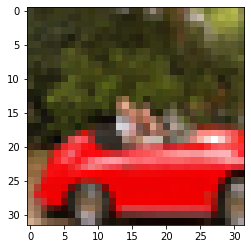

In [7]:
plt.imshow(xtr[99], cmap='gray')

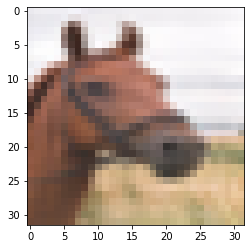

In [8]:
plt.imshow(xte[99], cmap='gray')

In [9]:
yte[99]

array([7], dtype=uint8)

In [10]:
ytr=tcg(ytr)
yte=tcg(yte)

In [11]:
xte=xte.reshape(xte.shape[0],xte.shape[1],xte.shape[2],3).astype('float32')/255
xtr=xtr.reshape(xtr.shape[0],xtr.shape[1],xtr.shape[2],3).astype('float32')/255

In [12]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(xtr,ytr, validation_data=(xte,yte),epochs=15, batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 186s 4ms/sample - loss: 1.7670 - accuracy: 0.3405 - val_loss: 1.3778 - val_accuracy: 0.4930
Epoch 2/15
50000/50000 [==============================] - 61s 1ms/sample - loss: 1.3874 - accuracy: 0.4977 - val_loss: 1.1930 - val_accuracy: 0.5704
Epoch 3/15
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.2350 - accuracy: 0.5583 - val_loss: 1.0610 - val_accuracy: 0.6194
Epoch 4/15
50000/50000 [==============================] - 63s 1ms/sample - loss: 1.1201 - accuracy: 0.6006 - val_loss: 0.9858 - val_accuracy: 0.6536
Epoch 5/15
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.0479 - accuracy: 0.6276 - val_loss: 0.8958 - val_accuracy: 0.6840
Epoch 6/15
50000/50000 [==============================] - 62s 1ms/sample - loss: 0.9830 - accuracy: 0.6533 - val_loss: 0.8646 - val_accuracy: 0.6954
Epoch 7/15
50000/50000 [==============================]

In [15]:
model.evaluate(xtr,ytr)

50000/50000 [==============================] - 31s 626us/sample - loss: 0.5723 - accuracy: 0.8021


[0.5723171883678436, 0.80206]

In [16]:
score = model.evaluate(xte,yte)

10000/10000 [==============================] - 6s 577us/sample - loss: 0.7091 - accuracy: 0.7536


In [17]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7091081318855286
Test accuracy: 0.7536


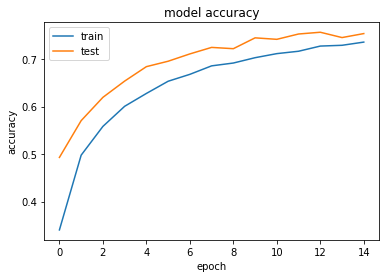

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

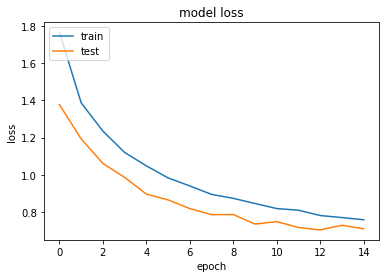

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
model.save("CNN_cifar_10.h5")